#### Importações e Configurações
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# Setings
# definindo o estilo das plotagens
plt.style.use("seaborn") 
# configurando o Pandas para mostrar valores em float com separador de milhar
pd.set_option('display.float_format', '{:,.2f}'.format)

##### Use este código no Colab para Fazer upload do arqivo de Dados
~~~
#Upload do arquivo
from google.colab import files
arq = files.upload()
~~~

#### Criando o Data Frame

In [2]:
# Criando o Data Frame
df= pd.read_excel("data\AdventureWorks.xlsx")

In [3]:
# Verificando os 5 primeiros registros
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [4]:
# Quantidade de linhas e colunas
df.shape

(904, 16)

In [5]:
# quais os tipod de dados?
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [6]:
# informações rativas aos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [7]:
# Qual a recieta total
round(df['Valor Venda'].sum(), 2)

5984606.14

In [8]:
# Qual o custo Total?
df['Custo'] = df['Quantidade'] * df['Custo Unitário']
df['Custo'].sum()

2486783.05

In [9]:
# Achar o lucro total
df['Lucro'] = df['Valor Venda'] - df['Custo']
round(df['Lucro'].sum(), 2)

3497823.09

In [10]:
# Tempo de envio
df['Tempo de envio'] = df['Data Envio'] - df['Data Venda']
df['Tempo de envio'].head(5)

0   20 days
1    5 days
2    6 days
3    6 days
4    7 days
Name: Tempo de envio, dtype: timedelta64[ns]

In [11]:
df['Tempo de envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
df['Tempo de envio'].head(5)

0    20
1     5
2     6
3     6
4     7
Name: Tempo de envio, dtype: int64

In [12]:
# Verificando o tipo
df['Tempo de envio'].dtype

dtype('int64')

In [13]:
# Tempo de envio médio
round(df['Tempo de envio'].mean(), 2)

8.54

In [14]:
#Médias do tempo de envio por marca
df.groupby('Marca')['Tempo de envio'].mean()

Marca
Adventure Works   8.66
Contoso           8.47
Fabrikam          8.51
Name: Tempo de envio, dtype: float64

#### Tratando Missing Values

In [15]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo de envio    0
dtype: int64

#### Análises

###### Lucro X Ano e Marca

In [16]:
# lucro por ano e marca
df.groupby([df['Data Venda'].dt.year , "Marca"])['Lucro'].agg(Soma='sum')

Soma
Data Venda Marca                       
2008       Adventure Works   306,641.16
           Contoso            56,416.00
           Fabrikam        1,557,020.55
2009       Adventure Works   405,395.08
           Contoso           138,258.95
           Fabrikam        1,034,091.35

In [17]:
lucro_ano = df.groupby([df['Data Venda'].dt.year , "Marca"])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


###### Total de Produtos Vendidos

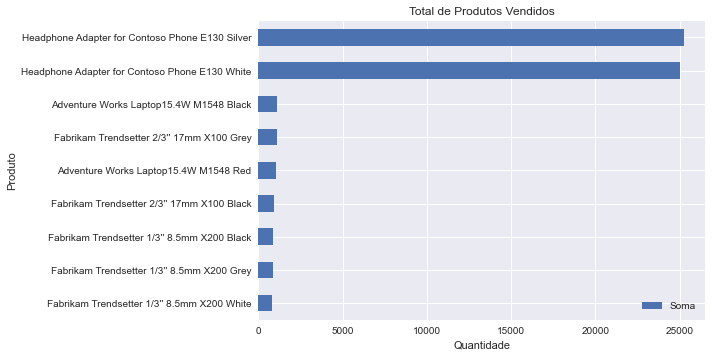

'----------------------------------------------------------------------------------------------------'

,Soma
Produto,
Headphone Adapter for Contoso Phone E130 Silver,25232
Headphone Adapter for Contoso Phone E130 White,25008
Adventure Works Laptop15.4W M1548 Black,1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
Adventure Works Laptop15.4W M1548 Red,1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


In [18]:
# Qual o Total de Procutos Vendidos
df.groupby("Produto")['Quantidade'].agg(Soma='sum').sort_values('Soma',ascending=True).plot.barh(title="Total de Produtos Vendidos")
plt.xlabel('Quantidade')
plt.ylabel('Produto')
plt.show()
display(('-' *100))
df.groupby("Produto")['Quantidade'].agg(Soma='sum').sort_values('Soma',ascending=False)

###### Lucro X Ano

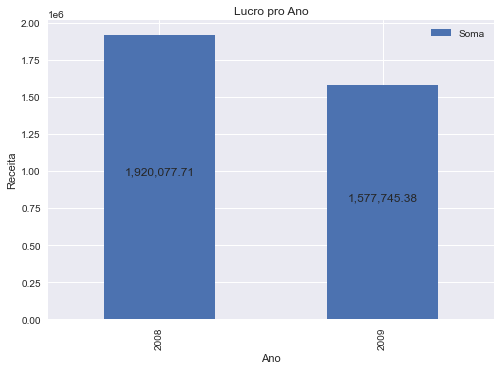

,Soma
Data Venda,
2008,"1,920,077.71"
2009,"1,577,745.38"


In [19]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].agg(Soma='sum').plot.bar(title="Lucro pro Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")

for i, v in enumerate(df.groupby(df['Data Venda'].dt.year)['Lucro'].agg(Soma='sum').reset_index()["Soma"]):
    plt.text(x=i , y = v/2 , s=f"{v:,.2f}", 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict=dict(fontsize=12) #mudar a fonte pro seu caso!
            )
plt.show()   
df.groupby(df['Data Venda'].dt.year)['Lucro'].agg(Soma='sum')

##### Vendas em 2009

In [20]:
# Vendas do ano de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


##### Lucro de 2009 por Mês

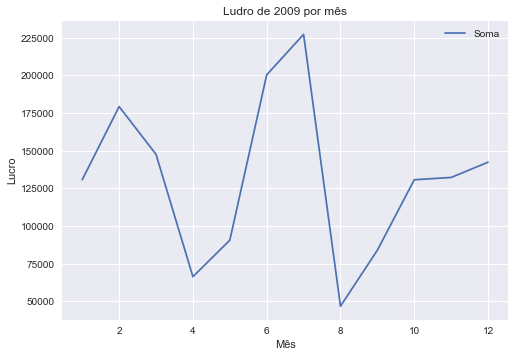

Data Venda,1,2,3,4,5,6,7,8,9,10,11,12
Soma,"130,719.04","179,228.92","147,538.25","66,354.39","90,540.00","200,310.41","227,134.51","46,756.42","83,952.62","130,678.05","132,202.23","142,330.53"


In [21]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].agg(Soma='sum').plot(title="Ludro de 2009 por mês")
plt.xlabel("Mês")
plt.ylabel("Lucro")
plt.show()
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].agg(Soma='sum').T

##### Lucro por Marca em 2009

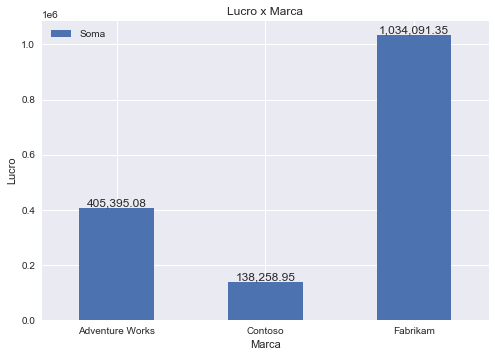

In [22]:
df_2009.groupby("Marca")["Lucro"].agg(Soma='sum').plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal')
for i, v in enumerate(df_2009.groupby("Marca")["Lucro"].agg(Soma='sum').reset_index()["Soma"]):
    plt.text(x=i , y = v-1000 , s=f"{v:,.2f}", 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict=dict(fontsize=12) #mudar a fonte pro seu caso!
            )

##### Lucro por Classe em 2009

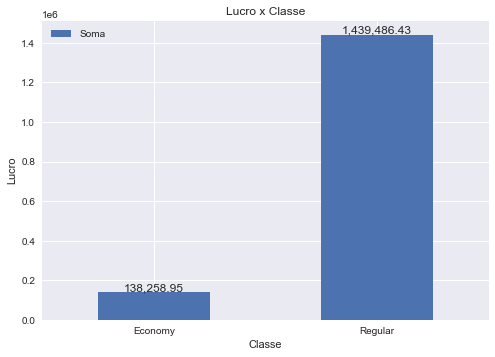

In [23]:
df_2009.groupby("Classe")["Lucro"].agg(Soma='sum').plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal')
for i, v in enumerate(df_2009.groupby("Classe")["Lucro"].agg(Soma='sum').reset_index()["Soma"]):
    plt.text(x=i , y = v-1000 , s=f"{v:,.2f}", 
             horizontalalignment='center', 
             verticalalignment='bottom', 
             fontdict=dict(fontsize=12) #mudar a fonte pro seu caso!
            )

In [24]:
# Descrição do tempo de envio
df["Tempo de envio"].describe()

count   904.00
mean      8.54
std       3.06
min       4.00
25%       6.00
50%       9.00
75%      11.00
max      20.00
Name: Tempo de envio, dtype: float64

##### Avaliando Outliers

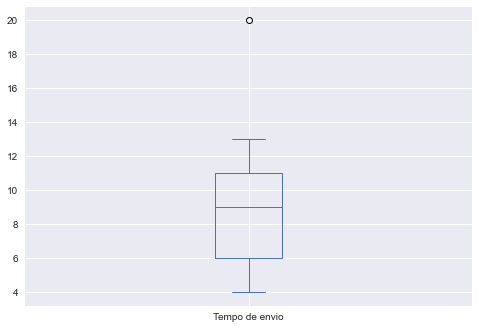

In [25]:
# Gráfico de Boxplot
df["Tempo de envio"].plot.box();

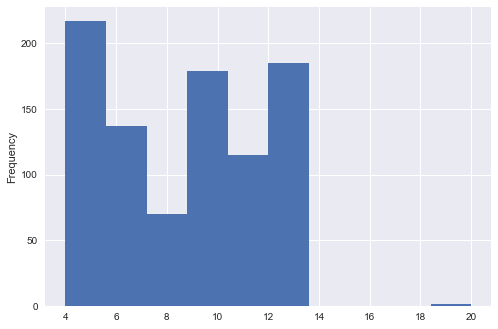

In [26]:
# Histograma
df["Tempo de envio"].plot.hist();

In [27]:
#Tempo mínimo de envio
df["Tempo de envio"].min()

4

In [28]:
#Tempo máximo de envio
df["Tempo de envio"].max()

20

In [29]:
#Identificando o Outlier
df[df["Tempo de envio"]==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [ ]:
df.to_csv("df_vendas_novo.csv", index=False)